<a href="https://colab.research.google.com/github/xDocka15/MPA-MLF_Dockal/blob/main/mlf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

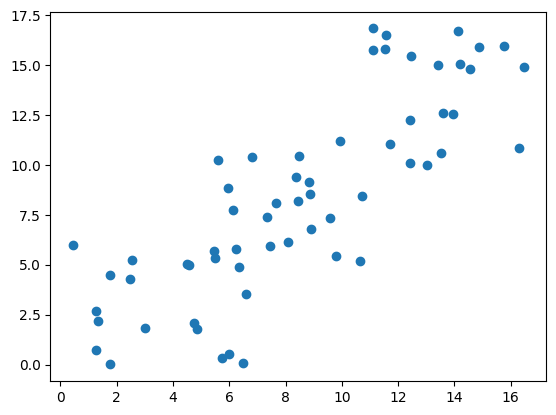

In [38]:
loaded_points = np.load('k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

In [39]:
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here #
    #loaded_points[np.random.choice(loaded_points.shape[0], size=k, replace=False)]
    initial_clusters = loaded_points[np.random.choice(loaded_points.shape[0], size=k, replace=False)]

    #initial_clusters = np.array([])


    #plt.figure()
    #plt.scatter(loaded_points[:,0],loaded_points[:,1])
    #plt.scatter(initial_clusters[:,0],initial_clusters[:,1])

    ###################################

    return initial_clusters




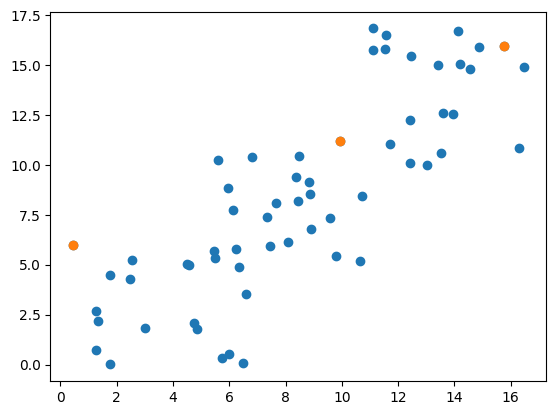

In [44]:
centroids = initialize_clusters(loaded_points,3)
plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])
plt.scatter(centroids[:,0],centroids[:,1])


In [64]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here #
    #print(points)

    distances_array = np.linalg.norm(points - centroid, axis=1)


    ###################################

    return distances_array

In [72]:
distancetocentroid =  calculate_metric(loaded_points, centroids[1])

print(distancetocentroid)

[ 4.69052535  4.42859356 11.34833939  7.51023356  2.87030309  6.54937997
 11.641122    5.37957394 10.70046316  0.          4.22548679 13.85629936
  3.84996592  6.37323361  5.14869532 10.57002965  5.85645399 12.13959279
  6.82251861  7.26518337  2.70862188  2.71021869  4.94058317  5.77218311
  4.62608406  3.62455122  4.62003321  1.63414107 13.5976417   8.21483498
  5.76175345  9.48583169  7.36201824 11.63247196 10.47906082  1.78760843
  5.13180771  8.22262552  5.74213503  3.8555891   6.05199956  8.35191306
  5.56821752 10.82130465  2.38852727  2.31357515  2.87586958  4.54866423
  7.53100168  3.36403848  3.90741954  5.84448785  3.32339242 10.16650436
  7.09343005 11.61756878 12.45616052  6.93296772  4.90608115  3.22596247]


In [103]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here #
    distance0 = distancetocentroid =  calculate_metric(points, centroids_points[0])
    distance1 = distancetocentroid =  calculate_metric(points, centroids_points[1])
    distance2 = distancetocentroid =  calculate_metric(points, centroids_points[2])

    distances_array2 = np.asarray([calculate_metric(points, centroids) for centroids in centroids_points])

    distances_array = np.column_stack((distance0, distance1, distance2))
    ###################################

    return distances_array2

In [112]:
distance_array = compute_distances(loaded_points, centroids)
distance_array = distance_array.T
print(distance_array)

[[ 4.66121133  4.69052535 14.44356314]
 [11.64995724  4.42859356  6.69508341]
 [18.24749574 11.34833939  7.76631248]
 [ 1.28366353  7.51023356 18.33114429]
 [ 9.06205497  2.87030309 10.56092772]
 [13.94044763  6.54937997  5.78214786]
 [18.57101805 11.641122    7.72566423]
 [12.46707868  5.37957394  7.63696888]
 [17.89879969 10.70046316  6.08146105]
 [ 7.53100168  0.         10.82130465]
 [ 3.87921891  4.22548679 14.99887698]
 [21.2305503  13.85629936  6.12430989]
 [11.29988396  3.84996592  7.51132791]
 [ 5.15242538  6.37323361 16.57636825]
 [ 2.54593758  5.14869532 15.78229786]
 [18.10103066 10.57002965  1.98907116]
 [ 1.68503432  5.85645399 16.63158717]
 [19.65193517 12.13959279  3.39497557]
 [ 0.88705899  6.82251861 17.50404134]
 [14.54846742  7.26518337  5.99133685]
 [ 6.75867453  2.70862188 12.64822334]
 [ 4.99442788  2.71021869 13.51940272]
 [ 3.3574197   4.94058317 15.27848317]
 [12.11982328  5.77218311  9.34958901]
 [12.12192765  4.62608406  6.19827791]
 [ 5.83477317  3.62455122

In [118]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #

    assigned_centroids = np.argmin(distances, axis=1)
    ###################################

    return assigned_centroids

[0 1 2 0 1 2 2 1 2 1 0 2 1 0 0 2 0 2 0 2 1 1 0 1 1 1 1 1 2 2 0 2 2 2 2 1 1
 2 0 1 1 2 0 2 1 1 1 1 0 1 1 1 1 2 2 2 2 0 0 1]


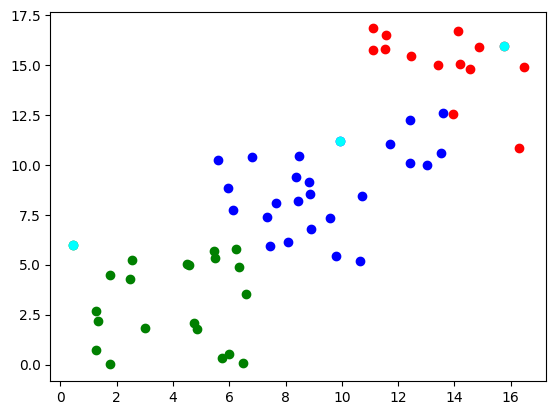

In [133]:
assined_centroids = assign_centroids(distance_array)

print(assined_centroids)

combined_array = np.column_stack((loaded_points, assined_centroids))
filtered_points0 = combined_array[combined_array[:, 2] == 0]
filtered_points1 = combined_array[combined_array[:, 2] == 1]
filtered_points2 = combined_array[combined_array[:, 2] == 2]


plt.figure()
plt.scatter(filtered_points0[:,0],filtered_points0[:,1], color="red")
plt.scatter(filtered_points1[:,0],filtered_points1[:,1], color="blue")
plt.scatter(filtered_points2[:,0],filtered_points2[:,1], color="green")
plt.scatter(centroids[:,0],centroids[:,1], color="cyan")

In [ ]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
# spocitat sumu chyb odchylky bodu od jejich centroidu

    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #
    combined_array = np.column_stack((assigned_centroids, distances))

    objective_function_value = 0.0

    ###################################

    return objective_function_value

In [ ]:
calculate_objective(assined_centroids, distance_array)